# American Sign Language real-time detection 

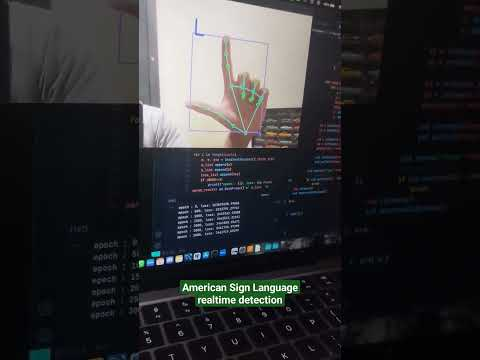

In [6]:
YouTubeVideo('WZGlasug6s8')

In [1]:
import os
import mediapipe as mp
import cv2
import matplotlib.pyplot as plt
import pickle
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils 
mp_drawing_styles = mp.solutions.drawing_styles
hands = mp_hands.Hands(static_image_mode=True, min_detection_confidence=0.9)

I0000 00:00:1720153390.950906       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2


INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [6]:
data_dir = 'asl_dataset'
data = []
labels = []
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i)):
            data_aux = []
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    for z in range(len(hand_landmarks.landmark)):
                        x = hand_landmarks.landmark[z].x
                        y = hand_landmarks.landmark[z].y
                        data_aux.append(x)
                        data_aux.append(y)
                data.append(data_aux)
                labels.append(i)
                
# save data
f = open('data.pickle', 'wb')
pickle.dump({'data':data,'labels':labels},f)
f.close() 

FileNotFoundError: [Errno 2] No such file or directory: 'asl_dataset'

/var/folders/2k/db0_ffvx4pz6fdx7xww_f8680000gn/T/ipykernel_69521/1161389684.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.

  plt.figure()


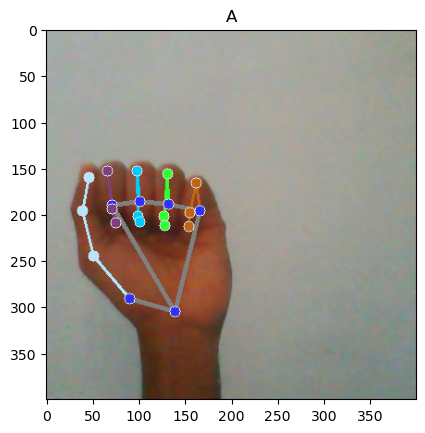

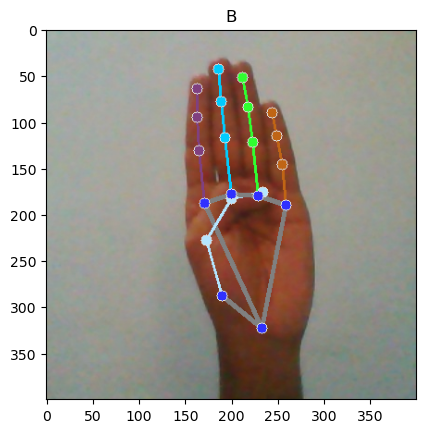

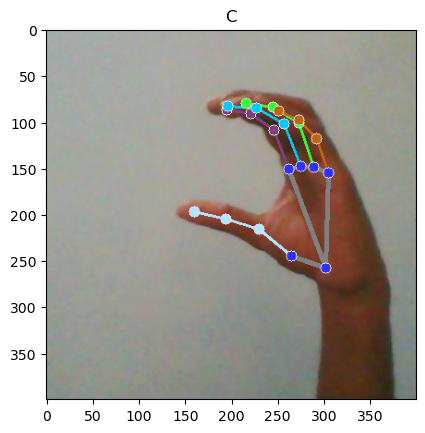

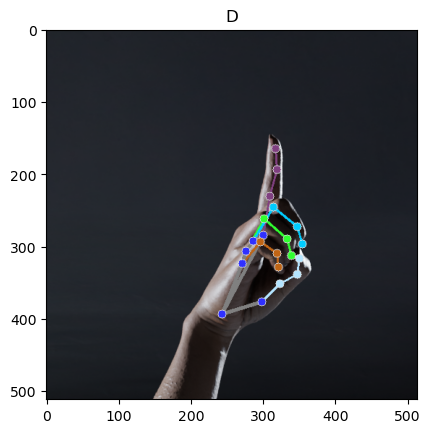

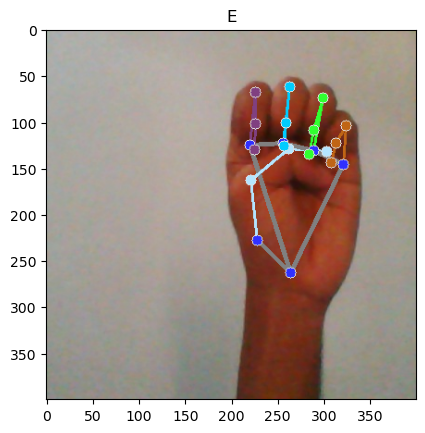

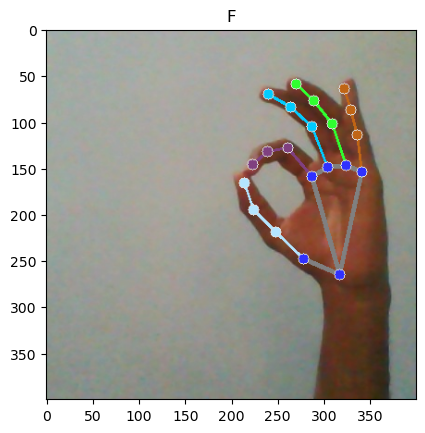

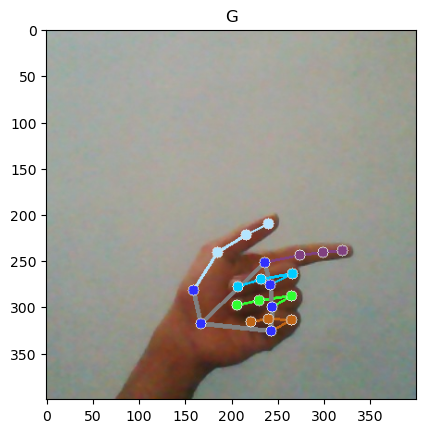

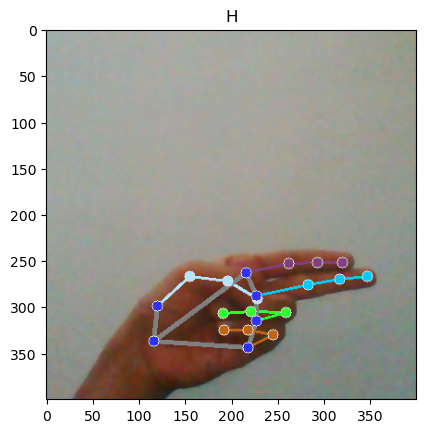

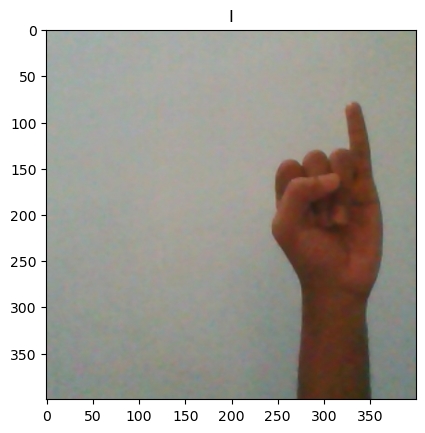

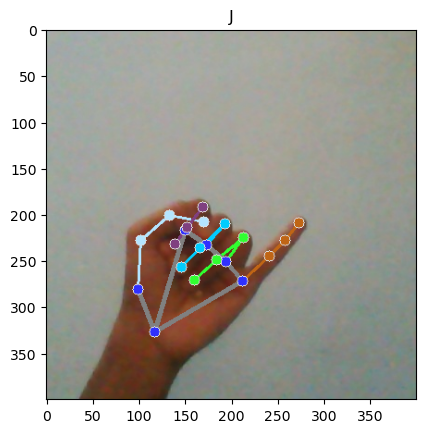

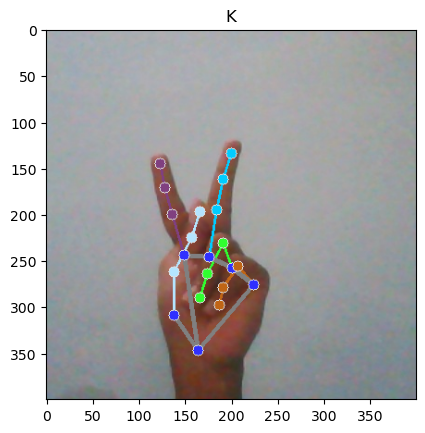

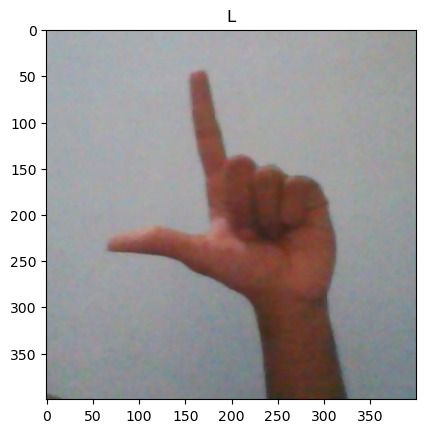

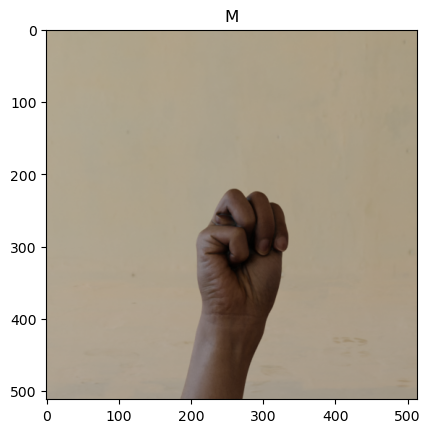

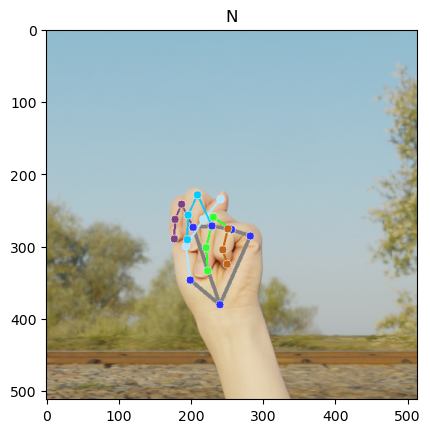

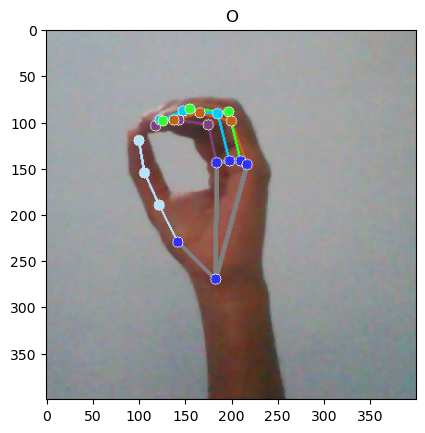

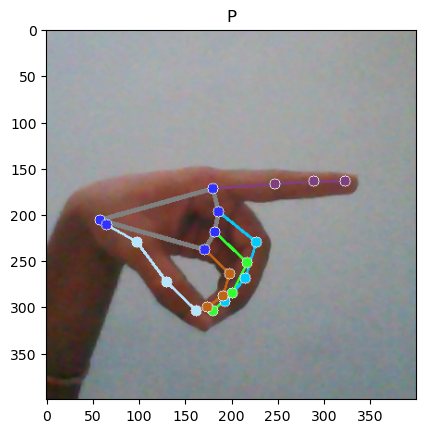

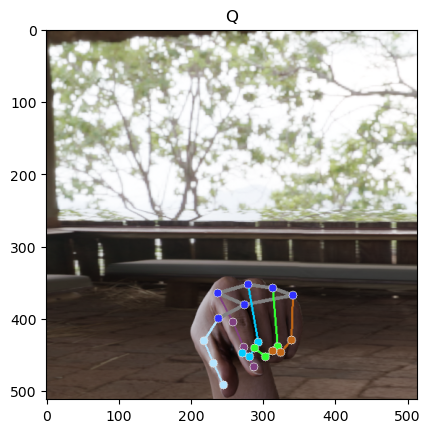

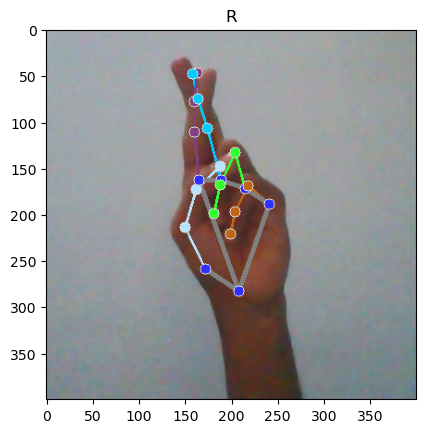

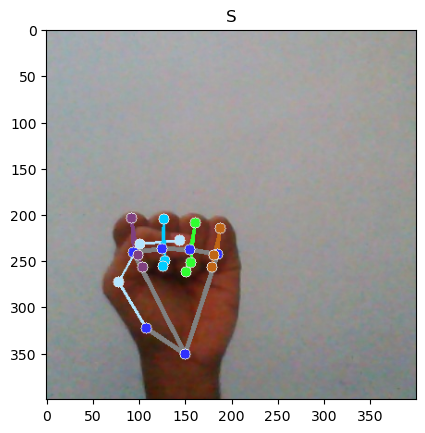

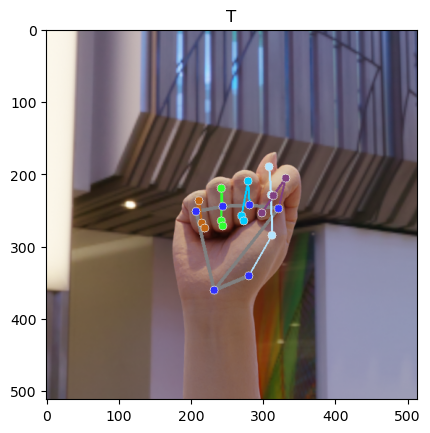

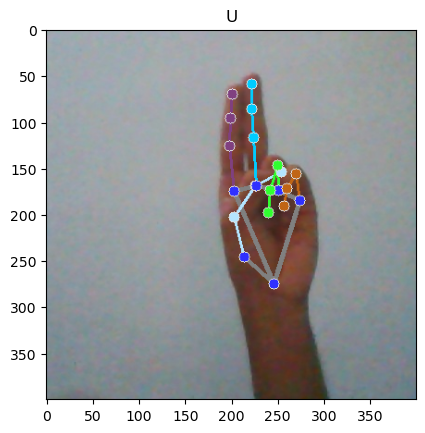

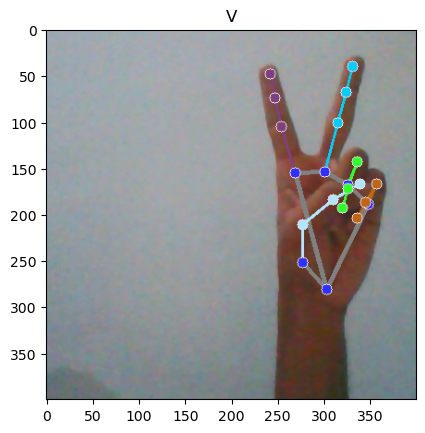

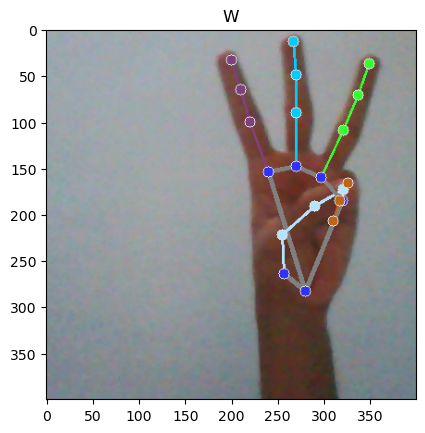

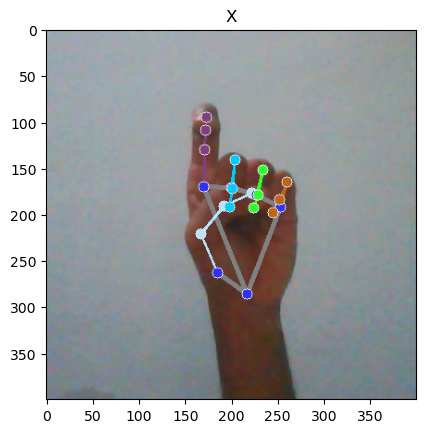

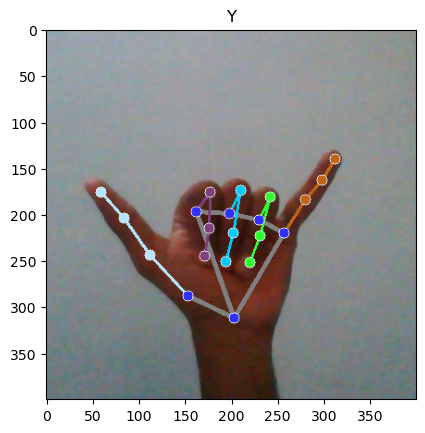

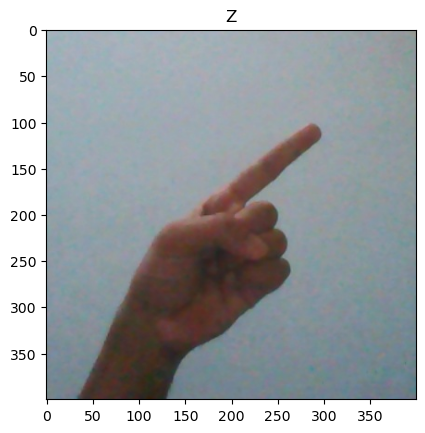

In [3]:
# visualize landmarks
data_dir = 'asl_dataset'
for i in sorted(os.listdir(data_dir)):
    if i == '.DS_Store':
        pass
    else:
        for j in os.listdir(os.path.join(data_dir,i))[0:1]:
            img = cv2.imread(os.path.join(data_dir,i,j))
            img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

            results = hands.process(img_rgb)
            if results.multi_hand_landmarks:
                for hand_landmarks in results.multi_hand_landmarks:
                    mp_drawing.draw_landmarks(
                        img_rgb, # img to draw
                        hand_landmarks,
                        mp_hands.HAND_CONNECTIONS,
                        mp_drawing_styles.get_default_hand_landmarks_style(),
                        mp_drawing_styles.get_default_hand_connections_style()

                    )

            
            plt.figure()
            plt.title(i)
            plt.imshow(img_rgb)
plt.show()

# Training

Mulai dari sini samppai bawah, code tidak saya run di Kaggle karena akan banyak memakan waktu (sebelumnya sudah saya run di komputer pribadi ), berikut saya sertakan codenya dan silahkan coba sendiri :)

In [3]:
# split data
print('p0')
with open('data.pickle', 'rb') as f:
    data_dict = pickle.load(f)

print('p0.5')
data = data_dict['data']
labels = data_dict['labels']

print("p1")
X_train, X_test, y_train, y_test = train_test_split(np.array(data), labels, test_size=0.15, random_state=22, shuffle=True)

print("P2")
# model
model = RandomForestClassifier(random_state=22)
model.fit(X_train,y_train)

print("P3")
# predict
pred=model.predict(X_test)

print("P4")
# accruracy
accuracy_score(y_test,pred)
print("succeed")

NameError: name 'data' is not defined

In [ ]:
# save model
f = open('model.p', 'wb')
pickle.dump({'model':model},f)
f.close() 

# Detection

In [3]:
# load model
model_dict = pickle.load(open('model.p','rb'))
model = model_dict['model']

/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.3.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/opt/homebrew/lib/python3.11/site-packages/sklearn/base.py:376: InconsistentVersionWarning: Trying to unpickle estimator RandomForestClassifier from version 1.3.2 when using version 1.5.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


Untuk mematikannya, tekan 'q'

In [4]:
cap = cv2.VideoCapture(1)

with mp_hands.Hands(min_detection_confidence=0.8, min_tracking_confidence=0.8) as hands:
    while cap.isOpened():

        data_aux=[]
        x_ = []
        y_ = []

        ret, frame = cap.read()
        H, W, _ = frame.shape

        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        frame_rgb = cv2.flip(frame_rgb, 1)
        frame_rgb.flags.writeable = False
        results = hands.process(frame_rgb)
        frame_rgb.flags.writeable = True 
        frame_rgb = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                mp_drawing.draw_landmarks(
                    frame_rgb, # img to draw
                    hand_landmarks,
                    mp_hands.HAND_CONNECTIONS,
                    mp_drawing.DrawingSpec(color=(28, 255, 3), thickness=5, circle_radius=10),
                    mp_drawing.DrawingSpec(color=(236, 255, 3), thickness=5, circle_radius=10)
                )


            for hand_landmarks in results.multi_hand_landmarks:
                for i in range(len(hand_landmarks.landmark)):
                    x = hand_landmarks.landmark[i].x
                    y = hand_landmarks.landmark[i].y
                    data_aux.append(x)
                    data_aux.append(y)
                    x_.append(x)
                    y_.append(y)

            x1 = int(min(x_) * W)-10
            y1 = int(min(y_) * H)-10

            x2 = int(max(x_) * W)-10
            y2 = int(max(y_) * H)-10
            prediction = model.predict([np.array(data_aux)[0:42]])[0]

            cv2.rectangle(frame_rgb, (x1,y1-10), (x2,y2), (255,99,173), 6)
            cv2.putText(frame_rgb, prediction, (x1,y1), cv2.FONT_HERSHEY_DUPLEX, 5, (255,0,0), 5, cv2.LINE_AA)

        cv2.imshow('frame',frame_rgb)  
        # cv2.waitKey(1)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()
cv2.waitKey(1)

I0000 00:00:1720153403.747979       1 gl_context.cc:344] GL version: 2.1 (2.1 Metal - 88.1), renderer: Apple M2


AttributeError: 'DecisionTreeClassifier' object has no attribute 'monotonic_cst'

: 